### Введение <a name="intro"></a>
Сборный проект по курсу Анализ бизнес-показателей.

#### Описание проекта<a name="subp01"></a>

Вы — маркетинговый аналитик развлекательного приложения `Procrastinate Pro+`. 

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Вам предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.


#### Описание данных<a class="anchor" id="subp02"></a>


В вашем распоряжении три датасета. Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, `orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу.

Структура **visits_info_short.csv**:

- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.

Структура **orders_info_short.csv**:
- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.

Структура **costs_info_short.csv**:
- `dt` — дата проведения рекламной кампании,
- `Channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию.


### Загрузите данные и подготовьте их к анализу <a name="par1"></a>

Загружаем библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats as st

#### Загрузка данных <a name="subp01"></a>

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`.
- заказы: `/datasets/orders_info_short.csv`. 
- расходы: `/datasets/costs_info_short.csv`. 

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [2]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('datasets/costs_info_short.csv')

Выведем первые 5 строчек датафреймов `visits`,`orders`,`costs` на экран.

In [3]:
print('Визиты:')
visits.head()

Визиты:


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
print('Заказы:')
orders.head()

Заказы:


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [5]:
print('Расходы:')
costs.head()

Расходы:


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Из первых строк невооруженным взглядом пропусков не видно.

#### Изучение данных и предобработка

 Выведем основную информацию для датафреймов с помощью метода `info()`.

In [6]:
names = ['Визиты (visits)','Заказы (orders)', 'Расходы (costs)']
tables = visits, orders, costs
i = 0
for df in tables:
    print('\n', 'Информация о таблице {}:'.format(names[i]), '\n')
    df.info()
    i+=1


 Информация о таблице Визиты (visits): 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

 Информация о таблице Заказы (orders): 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

 Информация о таблице Расходы (cost

Из таблицы видно, что в названии стобцов встречаются прописные буквы, заменим регистр и проверим, что в названиях столбцов больше нет других проблем.
Также видно, что временные данные имеют тип `object`, нужно обработать в дальнейших шагах.

In [7]:
i = 0
for df in tables:
    df.columns = df.columns.str.lower()
    print('Названия столбцов {}: {}'.format(names[i], df.columns.to_list()), '\n')
    i +=1

Названия столбцов Визиты (visits): ['user id', 'region', 'device', 'channel', 'session start', 'session end'] 

Названия столбцов Заказы (orders): ['user id', 'event dt', 'revenue'] 

Названия столбцов Расходы (costs): ['dt', 'channel', 'costs'] 



Видим, регистр исправлен, но нужно  удалить пробел и заменить названия для `user id`, `session start`, `session end`, `event dt`. 

Убираем проблемы для `visits`. Проверяем

In [8]:
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end'] 
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Убираем проблемы для `orders`. Проверяем.

In [9]:
orders.columns = ['user_id', 'event_dt', 'revenue'] 
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


#### Обработка пропусков 

Посмотрим количество пропусков:

In [10]:
i=0
for df in tables:
    print(f'Количество пропусков в таблице {names[i]} - {df.isnull().sum()}',  '\n')
    i+=1

Количество пропусков в таблице Визиты (visits) - user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64 

Количество пропусков в таблице Заказы (orders) - user_id     0
event_dt    0
revenue     0
dtype: int64 

Количество пропусков в таблице Расходы (costs) - dt         0
channel    0
costs      0
dtype: int64 



Видим, что пропусков нет.
Посмотрим дубликаты в таблицах. 

#### Обработка дубликатов

In [11]:
i=0
for df in tables:
    print(f'Количество дубликатов в таблице {names[i]} - {df.duplicated().sum()}',  '\n')
    i+=1

Количество дубликатов в таблице Визиты (visits) - 0 

Количество дубликатов в таблице Заказы (orders) - 0 

Количество дубликатов в таблице Расходы (costs) - 0 



Видим, что явных дубликатов нет. Проверим неявные дубликаты в стобцах `region`, `device`, `channel` в таблице `Визитов` и `Заказов`.

In [12]:
column = ['region', 'device', 'channel']
i = 0
for df in tables:
    
    for col in column:
        try:
            print(f'Уникальные элементы в стоблце {col} таблицы {names[i]}:', df[col].unique())
        except KeyError:
            pass
    i=+1

Уникальные элементы в стоблце region таблицы Визиты (visits): ['United States' 'UK' 'France' 'Germany']
Уникальные элементы в стоблце device таблицы Визиты (visits): ['iPhone' 'Mac' 'Android' 'PC']
Уникальные элементы в стоблце channel таблицы Визиты (visits): ['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']
Уникальные элементы в стоблце channel таблицы Заказы (orders): ['FaceBoom' 'MediaTornado' 'RocketSuperAds' 'TipTop' 'YRabbit'
 'AdNonSense' 'LeapBob' 'OppleCreativeMedia' 'WahooNetBanner'
 'lambdaMediaAds']


Неявных дубликатов также незаметно.

####  Обработка типов данных

Посмотрим типы данных во всех колонках: как мы видели раньше, типы данных не соответствуют сохранённым в них значениям в столбцах с датой и временем: `session_start`, `session_end` в таблице **визиты**, `event_dt` в таблице **заказы**, `dt` в таблице **расходы**.

In [13]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Видим, что данные перевели - теперь тип данных верный.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.  <a name="par2"></a>

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функция `get_profiles()`

In [14]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Функция `get_retention()` 

In [15]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция `get_conversion()` 

In [16]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция `get_ltv()` 

In [17]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )


#### Функция  `filter_data()` 

In [18]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df


#### Функция `plot_retention()` 

In [19]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1,style='o-',alpha =1.0,linewidth=4, 
        color=('thistle', 'teal','mistyrose', 'steelblue', 'slategrey','turquoise', \
               'wheat','rosybrown','darkslategray','cadetblue','lavender')
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2, style='o-',alpha =1.0,linewidth=4, 
        color=('thistle', 'teal','mistyrose', 'steelblue', 'slategrey','turquoise', \
               'wheat','rosybrown','darkslategray','cadetblue','lavender'))
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3,alpha =0.6,linewidth=3, 
                                            color=('thistle', 'teal','mistyrose', 'steelblue',  'slategrey',\
                                                   'turquoise','wheat','rosybrown','darkslategray','cadetblue','lavender'))
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4,alpha =0.7,linewidth=3, 
                                            color=('thistle', 'teal','mistyrose', 'steelblue',  'slategrey',\
                                                   'turquoise','wheat','rosybrown','darkslategray','cadetblue','lavender'))
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()


#### Функция `plot_conversion()` 

In [20]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1, style='o-',linewidth=4, 
                      color=('thistle', 'slategrey','turquoise', 'wheat','rosybrown','darkslategray','cadetblue',\
                             'lavender','teal','mistyrose', 'steelblue'))
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2,alpha =0.7,linewidth=3, 
                                            color=('thistle', 'slategrey','turquoise', 'wheat','rosybrown','darkslategray',\
                                                   'cadetblue', 'lavender','teal','mistyrose', 'steelblue'
                                                  ))
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


#### Функция `plot_ltv_roi` 

In [21]:
#функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1, style='o-',linewidth=4,alpha =0.8, 
               color=('slategrey','turquoise', 'wheat','rosybrown','darkslategray','cadetblue',\
                                                   'lavender','teal','mistyrose', 'steelblue', 'thistle'))
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2,linewidth=3,alpha =0.7, 
                                            color=('slategrey','turquoise', 'wheat','rosybrown','darkslategray','cadetblue',\
                                                   'lavender','teal','mistyrose', 'steelblue', 'thistle'))
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3,linewidth=3,alpha =0.6, 
                                           color=('slategrey','turquoise', 'wheat','rosybrown','darkslategray','cadetblue',\
                                                   'lavender','teal','mistyrose', 'steelblue', 'thistle'))
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4,style='o-',linewidth=4, 
               color=('slategrey','turquoise', 'wheat','rosybrown','darkslategray','cadetblue',\
                                                   'lavender','teal','mistyrose', 'steelblue', 'thistle'))
    plt.axhline(y=1, color='rosybrown', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5,linewidth=3,alpha =0.7, 
                                            color=('slategrey','turquoise', 'wheat','rosybrown','darkslategray','cadetblue',\
                                                   'lavender','teal','mistyrose', 'steelblue', 'thistle'))
    
    plt.axhline(y=1, color='rosybrown', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Профили пользователей. Минимальная и максимальная дата привлечения пользователей.

In [22]:
event=[]
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
profiles = get_profiles(visits, orders, event, costs, event_names=[])

profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [23]:
profiles['user_id'].nunique()

150008

Количесmво уникальных профилей -150 008. 

In [24]:
profiles.query('payer==True')['user_id'].count()

8881

При этом количество платящих пользоватлей - 8 881. 

In [25]:
profiles_paying = profiles.query('payer==True')
profiles_paying['user_id'].nunique()

8881

In [26]:
min_acquisition_date = profiles['dt'].min()
min_acquisition_date 

datetime.date(2019, 5, 1)

In [27]:
max_acquisition_date = profiles['dt'].max()
max_acquisition_date

datetime.date(2019, 10, 27)

Данные сооответсвуют описанию:  с 1 мая по 27 октября 2019 года.

#### Наиболее популярные страны и страны с наибольшим количеством платящих пользователей 

Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [28]:
#напишем формулу для формирования таблиц
def get_shares_table(profiles, dimension):
    top_dim = profiles.groupby(dimension).agg({'user_id': 'nunique', 'payer':['sum','mean'] })
    top_dim.columns = ['total_users','paying_users','paying_percent']
    top_dim['dim_share'] = top_dim ['total_users'] / top_dim['total_users'].sum()
    top_dim = top_dim.sort_values(by = 'total_users',ascending=False)\
    .style.format({'paying_percent':'{:.2%}','dim_share':'{:.2%}'})
    return top_dim

In [29]:
top_countries = get_shares_table(profiles, 'region')
top_countries

,total_users,paying_users,paying_percent,dim_share
region,,,,
United States,100002,6902,6.90%,66.66%
UK,17575,700,3.98%,11.72%
France,17450,663,3.80%,11.63%
Germany,14981,616,4.11%,9.99%


Видим, что две трети уникальных посетителей находятся в США - 66%. На три другие страны приходится около 10 % пользователей.

Интересно, как распределены доли платящих пользователей:  
в США платят почти 7% всех пользователей, тогда как в других регионах показатель не более 4.2 %.
Получается, что США как регион наиболее хорошо себя показывает на текущий момент.

#### Наиболее популярные устройства и устройства с наибольшим количеством платящих пользователей 

Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [30]:
top_devices = get_shares_table(profiles, 'device')
top_devices

,total_users,paying_users,paying_percent,dim_share
device,,,,
iPhone,54479,3382,6.21%,36.32%
Android,35032,2050,5.85%,23.35%
PC,30455,1537,5.05%,20.30%
Mac,30042,1912,6.36%,20.03%


Видим, что более трети уникальных посетителейиспользуют `iPhone` - 36 %. Однако процент платящих пользователей выше у тех, кто пользуется `Mac`, однако не так значително. Разница между показателями на такая яркая, как по регионам.

#### Наиболее популярные каналы и каналы с наибольшим количеством платящих пользователей 

Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.


In [31]:
top_channels = get_shares_table(profiles, 'channel')
top_channels

,total_users,paying_users,paying_percent,dim_share
channel,,,,
organic,56439,1160,2.06%,37.62%
FaceBoom,29144,3557,12.20%,19.43%
TipTop,19561,1878,9.60%,13.04%
OppleCreativeMedia,8605,233,2.71%,5.74%
LeapBob,8553,262,3.06%,5.70%
WahooNetBanner,8553,453,5.30%,5.70%
RocketSuperAds,4448,352,7.91%,2.97%
MediaTornado,4364,156,3.57%,2.91%
YRabbit,4312,165,3.83%,2.87%


Видим, что наибольшее количество уникальных пользователей приходят из органического траффика (37%).
Однако там один из самых маленьких процентов платящих пользователей (2%).
На втором месте по количеству пользователей - `FaceBoom` (19%), далее - `TipTop` (13%). Около 6 % - у `OppleCreativeMedia`, `LeapBob`, `WahooNetBanner`. 	

Самый высокий процент платящих - у канала `FaceBoom`-12%.

`AdNonSense` и `lambdaMediaAds` - на втором и третьем месте по размеру доли платящих пользователей - 11.3% и 10.5%. 
Третитий по размеру и четвертый по проценту платящих - `TipTop` 9.6% платящих.
Далее - `RocketSuperAds` - 8%, `WahooNetBanner`- 5.3%

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Общая сумма расходов на маркетинг.
Посчитайте общую сумму расходов на маркетинг.

In [32]:
print('{:.0f}'.format(costs['costs'].sum()))

105497


Совокупные расходы составили 105 497. 

#### Распределение трат по рекламным источникам
Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [33]:
costs_by_source = costs.groupby('channel')['costs'].sum().reset_index().sort_values(by = 'costs', ascending = False)
costs_by_source['cost_share'] = costs_by_source['costs'] / costs_by_source['costs'].sum()

costs_by_source_print = costs_by_source.style.format({'cost_share':'{:.2%}'})
costs_by_source_print

,channel,costs,cost_share
6,TipTop,54751.300000,51.90%
1,FaceBoom,32445.600000,30.75%
7,WahooNetBanner,5151.000000,4.88%
0,AdNonSense,3911.250000,3.71%
4,OppleCreativeMedia,2151.250000,2.04%
5,RocketSuperAds,1833.000000,1.74%
2,LeapBob,1797.600000,1.70%
9,lambdaMediaAds,1557.600000,1.48%
3,MediaTornado,954.480000,0.90%
8,YRabbit,944.220000,0.90%


Видим, что болше всего расходов приходится на канал `TipTop` - более 50%, на втором месте канал `FaceBoom`, на который приходится 30% орасходов, оставльные расходы распределены между оставшимися каналами. 
`AdNonSense` и `lWahooNetBanner` - по 4 и 5 % соответственно, на остальные каналы - менешье затрат.

Нужно обратить внимание, что эти каналы должны также приносить клиентов (насколько обоснованы такие затраты?).

Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.

In [34]:
#приводим столбці к нужному значению 
costs['costs_pro_month'] = costs['dt'].astype('datetime64[M]').dt.date
costs['costs_pro_week'] = costs['dt'].astype('datetime64[W]').dt.date

#составляем таблицы
m_costs_raw = costs.pivot_table(index='costs_pro_month', columns='channel', values=costs, aggfunc = 'sum')
w_costs_raw = costs.pivot_table(index='costs_pro_week', columns='channel', values=costs, aggfunc = 'sum')

In [35]:
#переименовываем название столбцов
m_costs = m_costs_raw.rename(columns={"costs": ""})
m_costs.columns = [t[0] if t[0] else t[1] for t in m_costs.columns]

#меняем порядок столбцов
m_costs = m_costs[['TipTop', 'FaceBoom', 'WahooNetBanner', 'AdNonSense','OppleCreativeMedia', 'RocketSuperAds',\
                   'LeapBob','lambdaMediaAds', 'MediaTornado', 'YRabbit']]

In [36]:
#переименовываем название столбцов
w_costs = w_costs_raw.rename(columns={"costs": ""})
w_costs.columns = [t[0] if t[0] else t[1] for t in w_costs.columns]

#меняем порядок столбцов
w_costs = w_costs[['TipTop', 'FaceBoom', 'WahooNetBanner', 'AdNonSense','OppleCreativeMedia', 'RocketSuperAds',\
                   'LeapBob','lambdaMediaAds', 'MediaTornado', 'YRabbit']]

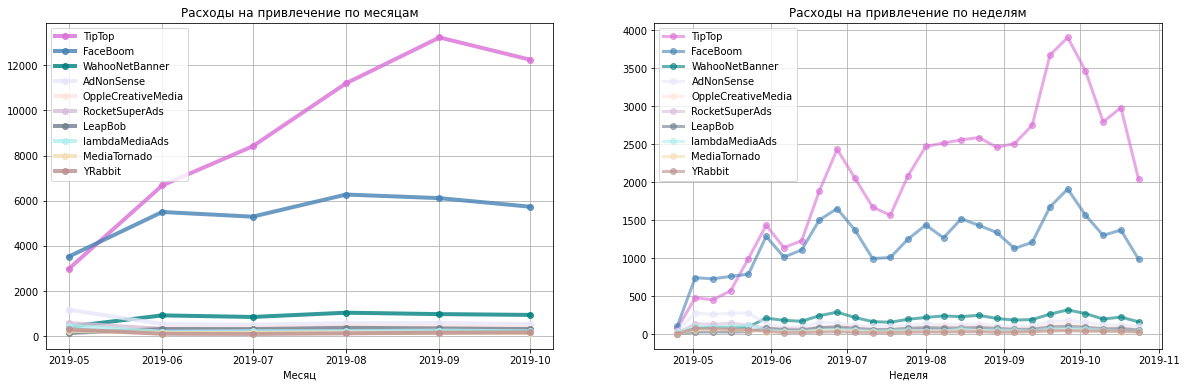

In [37]:
# первый график — по месяцам
plt.figure(figsize=(20, 6))
ax1 = plt.subplot(1, 2, 1)
m_costs.plot(grid=True, ax=ax1, style='o-',\
        color=( 'orchid','steelblue', 'teal','lavender','mistyrose', 'thistle', 'slategrey','paleturquoise', 'wheat',\
               'rosybrown','darkslategray'),alpha =0.8,linewidth=4
        )

plt.legend()
plt.xlabel('Месяц')
plt.title('Расходы на привлечение по месяцам')

# второй график — по неделям
ax2 = plt.subplot(1, 2, 2)

w_costs.plot(grid=True, ax=ax2,  style='o-',\
        color=( 'orchid','steelblue', 'teal','lavender','mistyrose', 'thistle', 'slategrey','paleturquoise', 'wheat',\
               'rosybrown','darkslategray'),alpha =0.6,linewidth=3)
plt.xlabel('Неделя')
plt.title('Расходы на привлечение по неделям')
plt.show()

По графику видно, что расходы на все каналы, кроме двух самых "дорогих" - довольно стабильны.
По двум самым затратным каналам - `TipTop`, `FaceBoom` - видим рост до сентября и августа соответственно, затем - снижение. 
Посмотрим распределение без самых крупных каналов

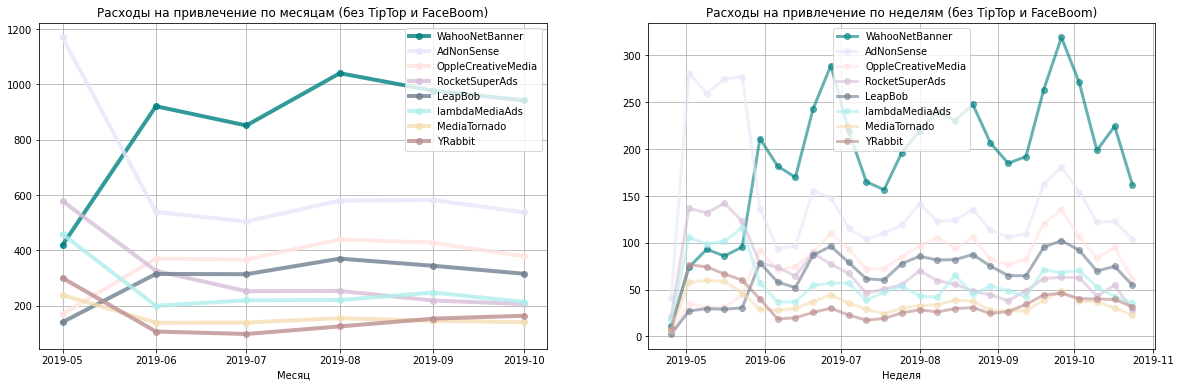

In [38]:
# первый график — по месяцам -  кроме двух самых "дорогих"
plt.figure(figsize=(20, 6))
ax1 = plt.subplot(1, 2, 1)
m_costs.drop(columns = ['TipTop', 'FaceBoom']).plot(grid=True, ax=ax1, style='o-',\
        color=(  'teal','lavender','mistyrose', 'thistle', 'slategrey','paleturquoise', 'wheat',\
               'rosybrown','darkslategray'),alpha =0.8,linewidth=4
        )

plt.legend()
plt.xlabel('Месяц')
plt.title('Расходы на привлечение по месяцам (без TipTop и FaceBoom)')

# второй график — по неделям - кроме двух самых "дорогих"
ax2 = plt.subplot(1, 2, 2)

w_costs.drop(columns =['TipTop', 'FaceBoom']).plot(grid=True, ax=ax2,  style='o-',\
        color=(  'teal','lavender','mistyrose', 'thistle', 'slategrey','paleturquoise', 'wheat',\
               'rosybrown','darkslategray'),alpha =0.6,linewidth=3)
plt.xlabel('Неделя')
plt.title('Расходы на привлечение по неделям (без TipTop и FaceBoom)')
plt.show()

Видим, что по каналу `WahooNetBanner` похожая динамика,но не такая драматичная, остальные источники более стабильны по расходам.

#### привлечение одного пользователя (CAC)
Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.


In [39]:
dims =['channel']
cac = profiles[['user_id', 'acquisition_cost'] + dims].query('channel != "organic"').drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'}).sort_values(by='cac', ascending=False)
        )
cac

,cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Из таблицы видим, что реклама `TipTop` - самая дорогая в расчете на одного пользователя - 2.79. ТОгда как реклама `FaceBoom` 1.11. Самый низкий показатель САС - менее 0.25 за пользователя - у канала `OppleCreativeMedia`, `YRabbit`,`MediaTornado` и`LeapBob`.

**Промежуточные результаты**
США как регион наиболее хорошо себя показывает на текущий момент. Две трети уникальных посетителей находятся в США. 
В США платят почти 7% всех пользователей, тогда как в других регионах показатель не более 4.2 %. 

При этом более трети уникальных посетителейиспользуют `iPhone`. Однако процент платящих пользователей выше у тех, кто пользуется `Mac`, однако не так значително. Разница между показателями на такая яркая, как по регионам.

Видим, что наибольшее количество уникальных пользователей приходят из органического траффика (37%).
Однако там один из самых маленьких процентов платящих пользователей.
Однако этот канал - самый низкий (нулевой) по количеству затрат. 

Самый высокий процент платящих - у канала `FaceBoom`, и также высокая доля во всем объеме пользователей приходится на этот канал - 19 %. Третитий по размеру и четвертый по проценту платящих - `TipTop` 9.6% платящих.
Они же являются и самыми дорогими. 
Больше всего расходов приходится на канал  `TipTop ` - более 50%, на втором месте канал  `FaceBoom `, на который приходится 30% орасходов, оставльные расходы распределены между оставшимися каналами. 

`AdNonSense` и `lambdaMediaAds` - на втором и третьем месте по размеру доли платящих пользователей - 11.34% и 10.47%. 
Привлечение пользователя в `TipTop` - самая дорогая - 2.79. Тогда как в  `FaceBoom` этот показатель 1.11. 

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Oкупаемость рекламы

Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
По условиям дата наблюдения -  1 ноября 2019 года, горизонт планирования по бизнес-плану -  две недели. 

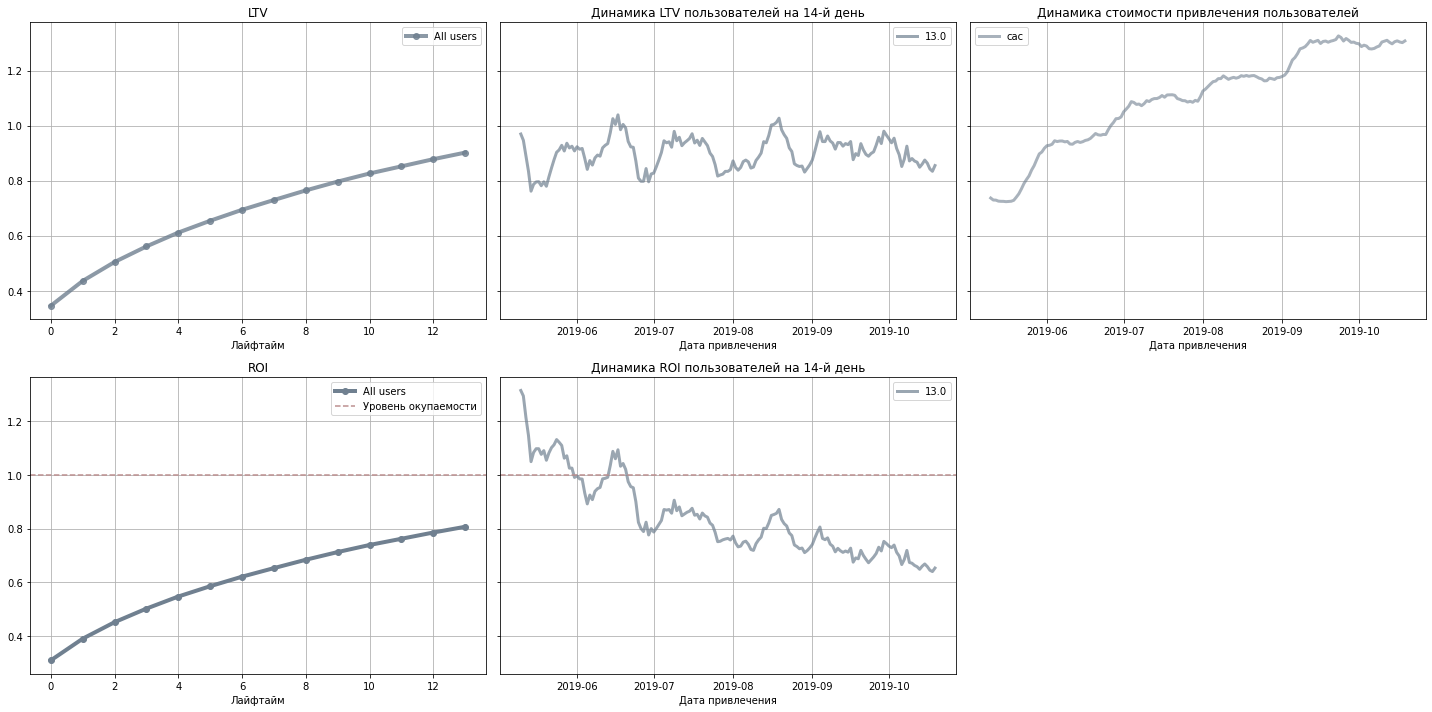

In [40]:
#Зададим момент изучения данных и горизонт окупаемости
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
#уберем органических пользоватлей 
profiles_mark = profiles.query('channel != "organic"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history =  get_ltv(profiles_mark,
       orders,
       observation_date,
       horizon_days,
       dimensions=[],
       ignore_horizon=False)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=10)


По графикам можно сделать такие выводы:
Реклама не окупается. ROI в конце наблюдаемого периода — только приближается к значению 80%.
САС растет значительно - возможно, дело в увеличении рекламного бюджета.
На LTV испытывает сезонность, но этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.

#### Конверсия пользователей и динамика её изменения

Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

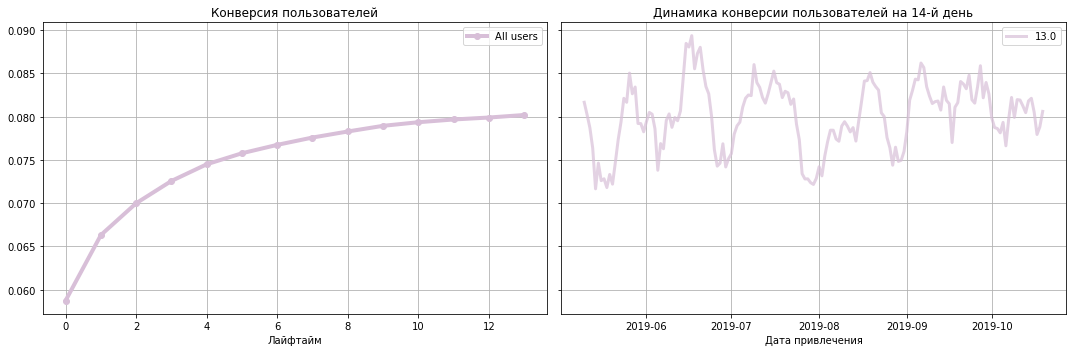

In [41]:
# расчёт конверсии
conversion_raw, conversion_grouped, conversion_history = get_conversion( 
       profiles_mark,
       orders, 
       observation_date,
       horizon_days,
       dimensions=[],
       ignore_horizon=False)
#  визуализация конверсии

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=10)

Видим, что конверсия растет.
При этом начиная с с июня динамика конверсии стабильно больше 7% и приближается k 8.5 %. 

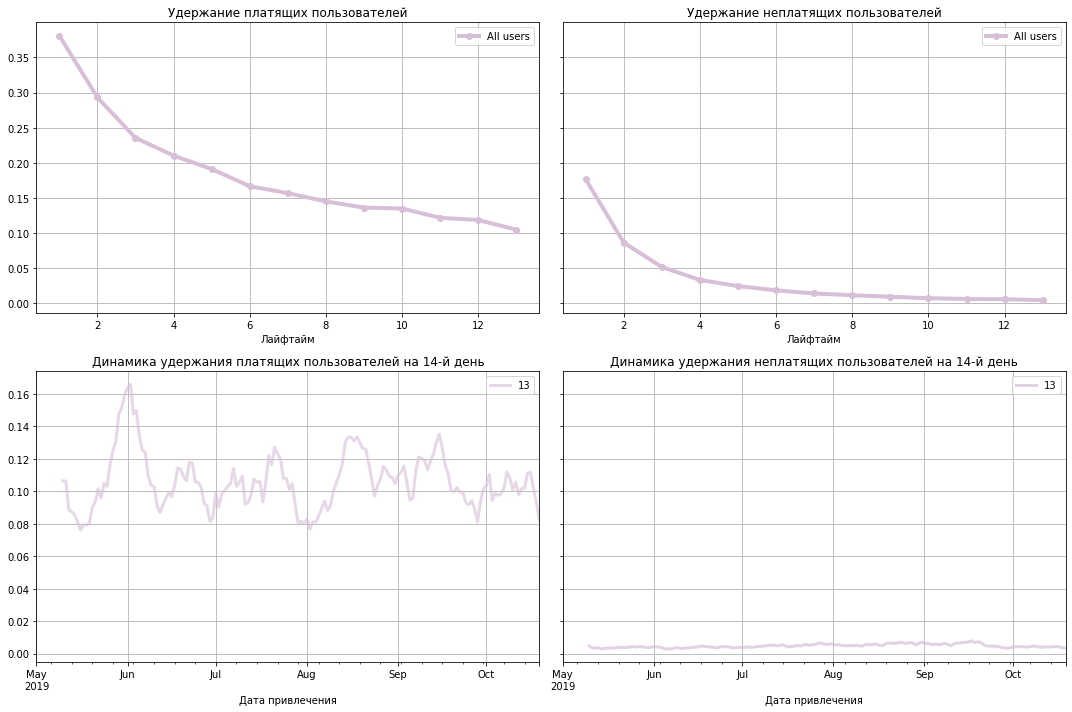

In [42]:
# расчёт удержания

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_mark,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)

#  визуализация удержания
plot_retention(retention_grouped, retention_history, horizon_days, window=10)

Видим, что удержание платящих пользователей снижается до 15%, удержание неплатящих пользователей снижается быстрее и приближается к нулю под конец горизонта планированивя.
При этом удержгие платящих в динамике - довольно стабильный показатель - около 10 - 12 %, но есть некоторое снижение в конце наблюдаемого периода. 

#### Pазбивкa по устройствам

Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.


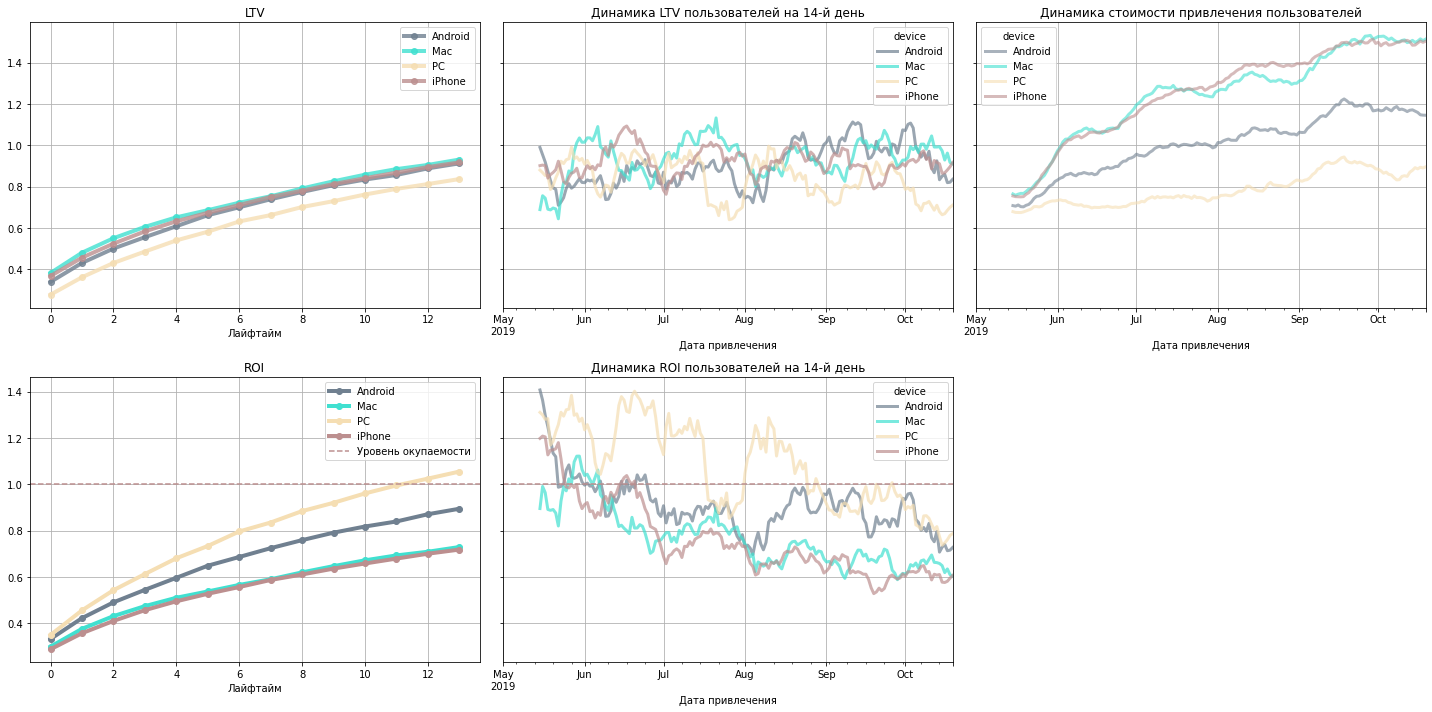

In [43]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history =  get_ltv(profiles_mark,
       orders,
       observation_date,
       horizon_days,
       dimensions=['device'],
       ignore_horizon=False)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=15)


Пользователи `PC` стабильно окупаются, а вот владельцы `iPhone`, `Android` и `Mac` — нет.
При этом видим, что самые дорогие в привлечении - `iPhone`и `Mac`.
При этом пользователи `iPhone` - самая крупная категория по девайсам.
Посмотрим, есть ли дополнительная причина, по мимо более высокой стоимости привлечения: посмотрим, объясняется ли разница низкой конверсией или низком удержанием.
Посчитаем и визуализируем конверсию, вызвав функции get_conversion() и plot_conversion().


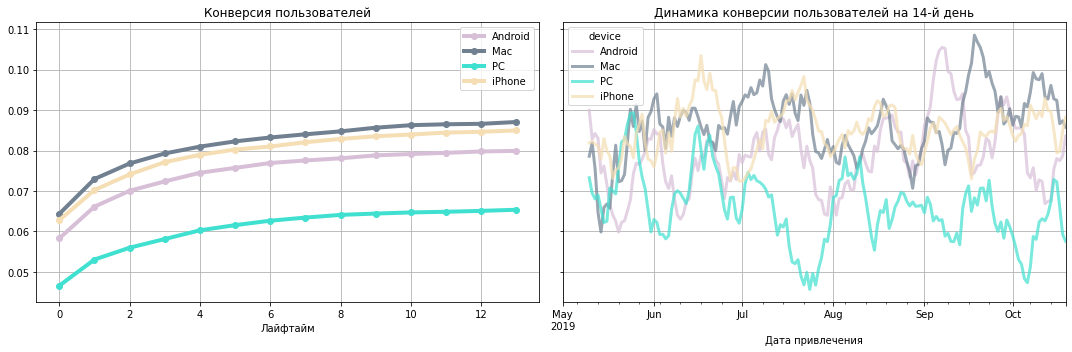

In [44]:
# расчёт конверсии
conversion_raw, conversion_grouped, conversion_history = get_conversion( 
       profiles_mark,
       orders, 
       observation_date,
       horizon_days,
       dimensions=['device'],
       ignore_horizon=False)
#  визуализация конверсии

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=10)

Судя по графикам, владельцы `Mac`,`iPhone`, `Android` (в порядке убывания) конвертируются очень хорошо и постоянно.
`PC` конвертируются хуже, но не значительно.

Посмотри удержание. Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель.

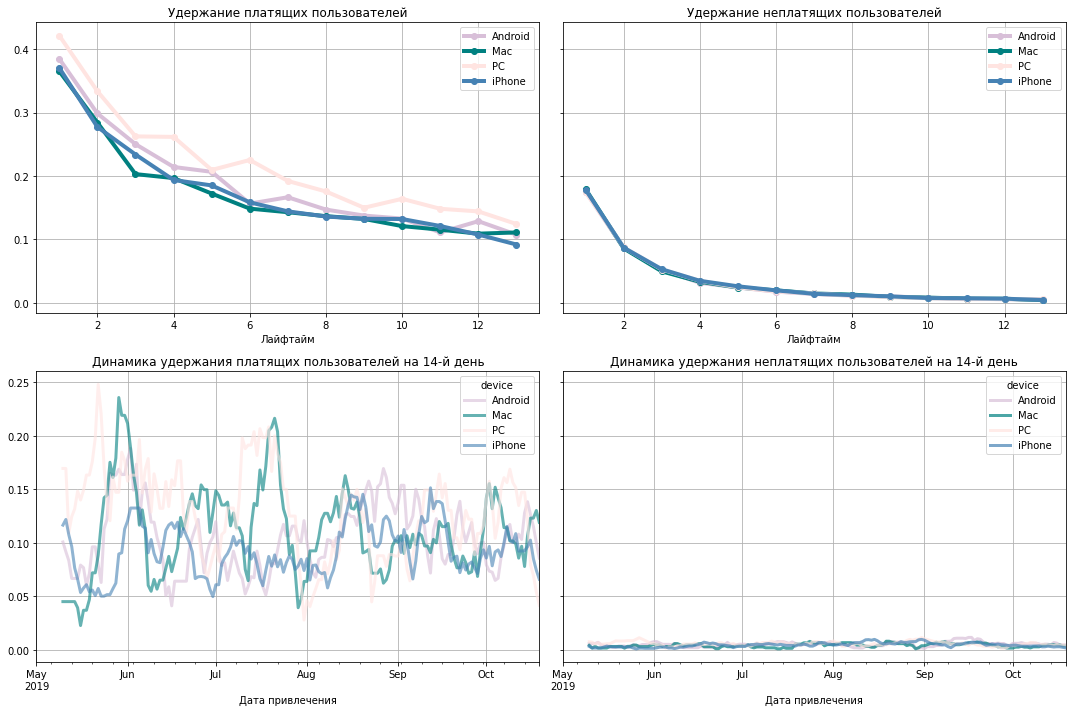

In [45]:
# расчёт удержания

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_mark,
    visits,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)

#  визуализация удержания
plot_retention(retention_grouped, retention_history, horizon_days, window=10)

По всем девайсам наблюдается снижение удержания, у`PC`немного  лучше, но не драматично - результат приближается к 10%. 

Видимо, основная проблема по `iPhone` - в высокой стоимости.


#### Pазбивкa по странам
Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.



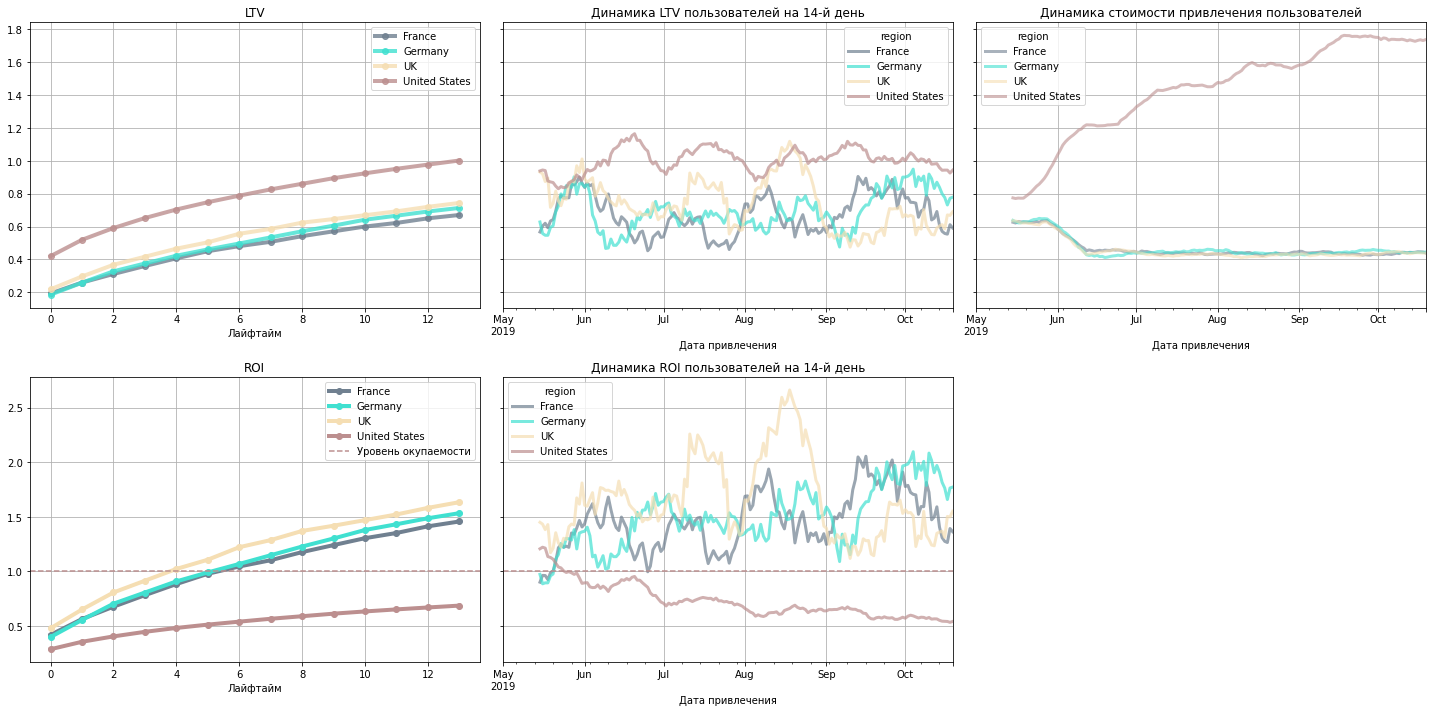

In [46]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history =  get_ltv(profiles_mark,
       orders,
       observation_date,
       horizon_days,
       dimensions=['region'],
       ignore_horizon=False)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=15)


Видим, что регионы `Germany`, `France`, `UK` — окупаются и со значительным отрывом от основного рынка - `United States`, который не окупается совсем.
При этом видим, что самые дорогие в привлечении пользователи - из региона `United States`.
Если по другим странам стоимость привлечения начиная с июня  снижается и достигает 0.4, то для США - Растёт и достигает значения 1.6.

Посмотрим, есть ли дополнительная причина, по мимо более высокой стоимости привлечения: посмотрим, объясняется ли разница низкой конверсией или низком удержанием.
Посчитаем и визуализируем конверсию, вызвав функции get_conversion() и plot_conversion().


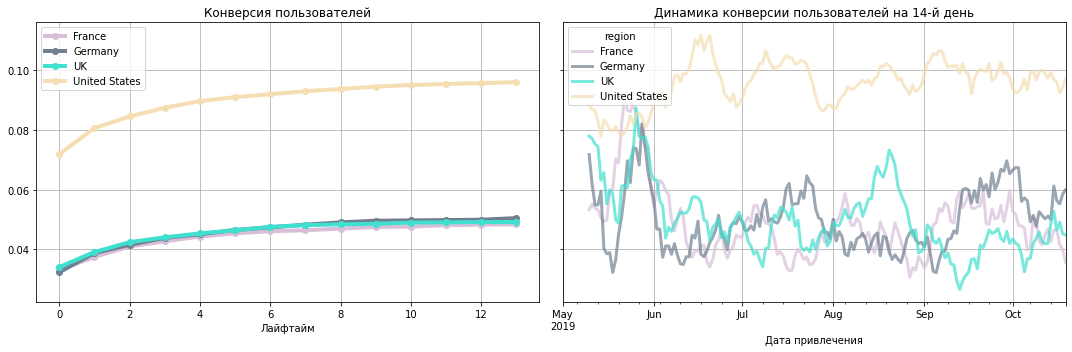

In [47]:
# расчёт конверсии
conversion_raw, conversion_grouped, conversion_history = get_conversion( 
       profiles_mark,
       orders, 
       observation_date,
       horizon_days,
       dimensions=['region'],
       ignore_horizon=False)
#  визуализация конверсии

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=10)

Конверсия пользователей - из региона `United States` вдвое лучше, чем по другим регионам.

Регионы `Germany`, `France`, `UK` — показывают стабильную конверсию, но ниже, чем у основного региона.

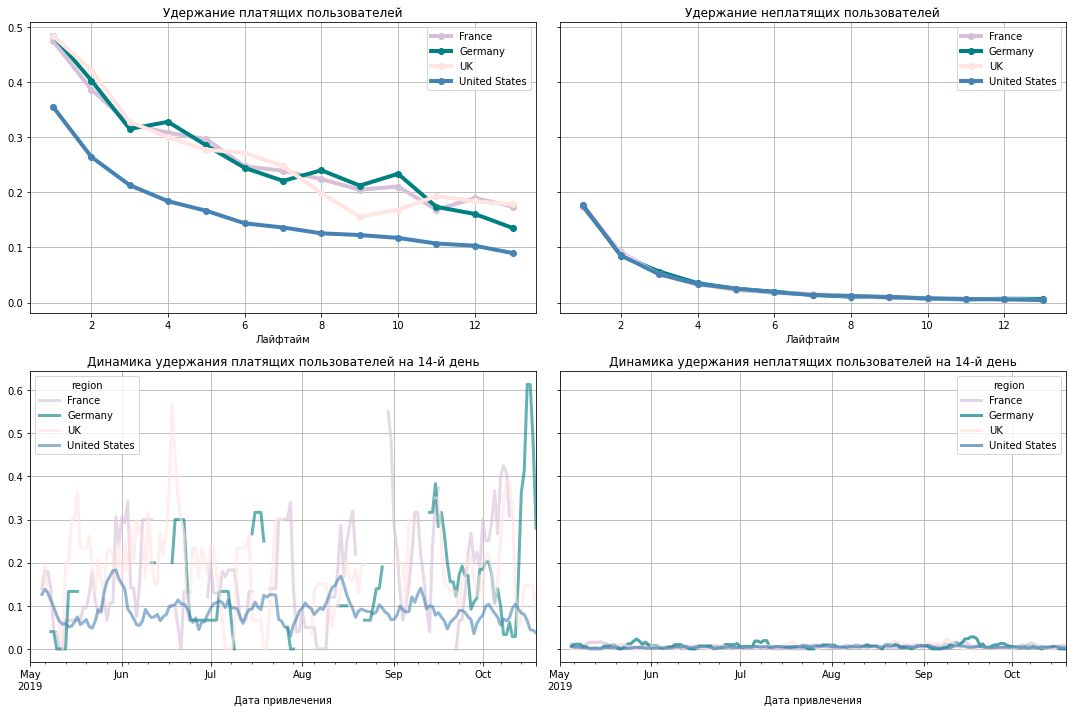

In [48]:
# расчёт удержания

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_mark,
    visits,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)

#  визуализация удержания
plot_retention(retention_grouped, retention_history, horizon_days, window=5)

При этом удержание платящих пользователей  из региона `United States` почти вдвое ниже, чем по другим регионам - ниже 10%.

Регионы `Germany`, `France`, `UK` — показывают удержание платящих пользователей на уровне 15-20% на конец рассматриваемого периода.

#### Pазбивкa по рекламным каналам

Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

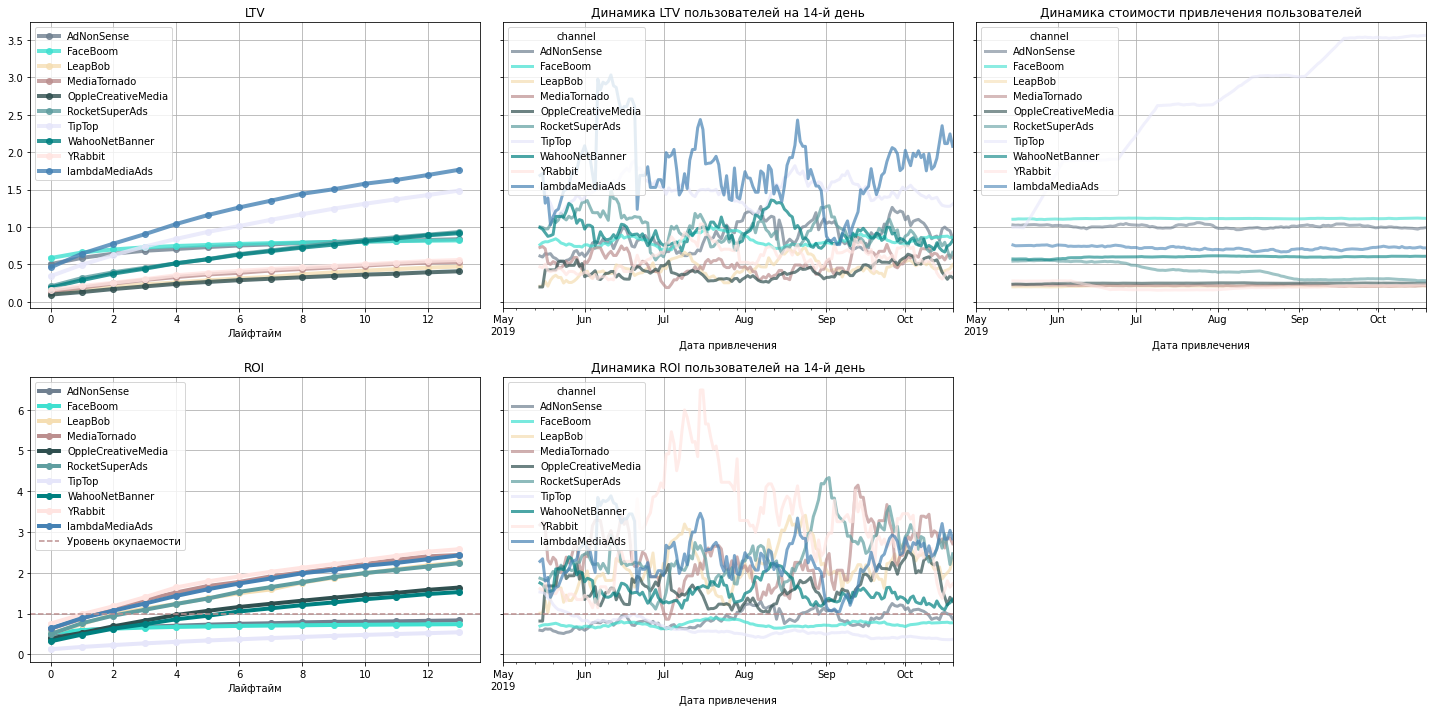

In [49]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history =  get_ltv(profiles_mark,
       orders,
       observation_date,
       horizon_days,
       dimensions=['channel'],
       ignore_horizon=False)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=15)



Видим, что наиболее высокий показатель **ltv** - у пользователей из канала `TipTop` и  `lambdaMediaAds`. 

У канала `TipTop`,`FaceBoom`, `AdNonSense`- затраты не окупаются.
При этом динамика стоимости привлечения у `TipTop` - самая высокая, растет и достигает 3.5.

Это один из основных каналов привлечения после органики, и по нему показатели совсем не тип-топ.

У каналов  `YRabbit`,`MediaTornado`, `lambdaMediaAds`, `LeapBob`, `RocketSuperAds` - затраты  окупаются. 
ROI на конец периода больше двух для всех этих каналов. 

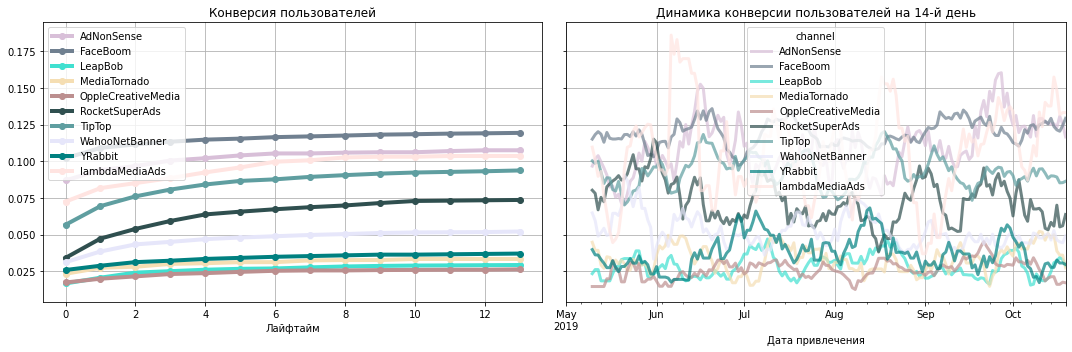

In [50]:
# расчёт конверсии
conversion_raw, conversion_grouped, conversion_history = get_conversion( 
       profiles_mark,
       orders, 
       observation_date,
       horizon_days,
       dimensions=['channel'],
       ignore_horizon=False)
#  визуализация конверсии

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=10)

Конверсия пользователей лучше всего у каналов: `FaceBoom`, `AdNonSense` и `lambdaMediaAds` - от 12% до 10% соответственно.

У канала `TipTop` - приближается к 10%.
Ниже всего у `LeapBob`, `YRabbit`, `MediaTornado`,  `OpelCreativeMedia` - меньше 4%.

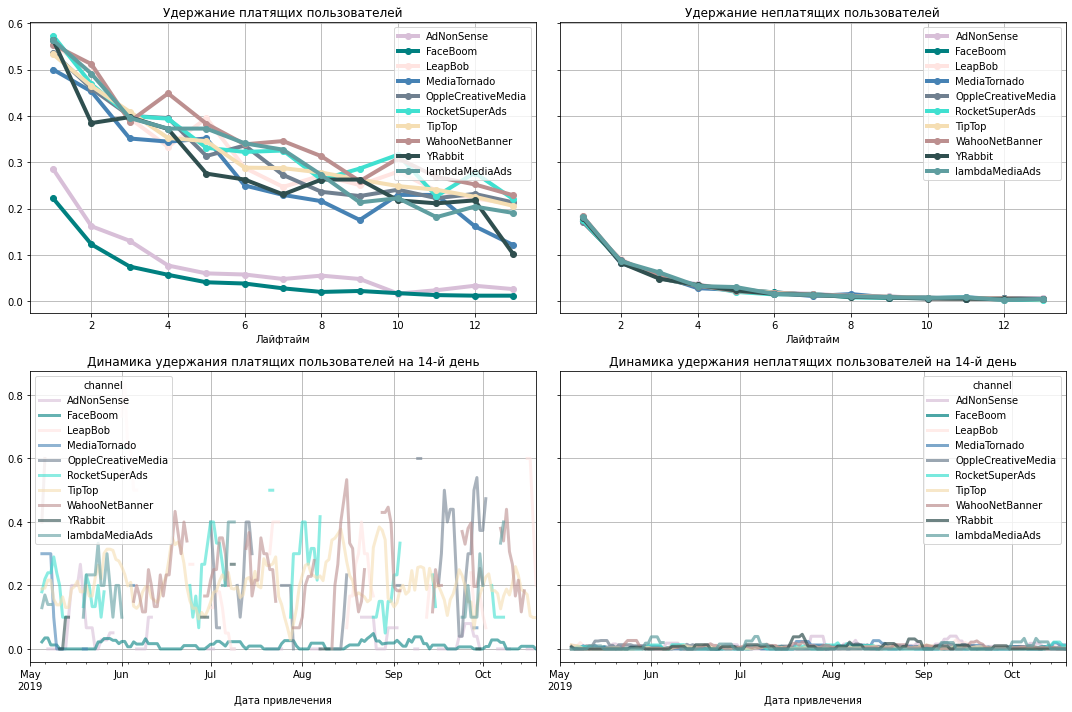

In [51]:
# расчёт удержания

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_mark,
    visits,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)

#  визуализация удержания
plot_retention(retention_grouped, retention_history, horizon_days, window=5)

Видим, что удержание платящих пользователей `FaceBoom`и `AdNonsense` - сильно проседает по сравнению с другими каналами - даже меньше приближается к нулю, на уровне неплатящих пользователей.
У `YRabbit`, `MediaTornado` - приближается к 10%, у остальных каналов - на уровне 20%. 

#### Динамика по США 

Посмотрим какая ситуация по США - основной рынок, который на данный момент показывает себя слабее других регионов.

In [52]:
profiles_usa = profiles_mark.query('region == "United States"')


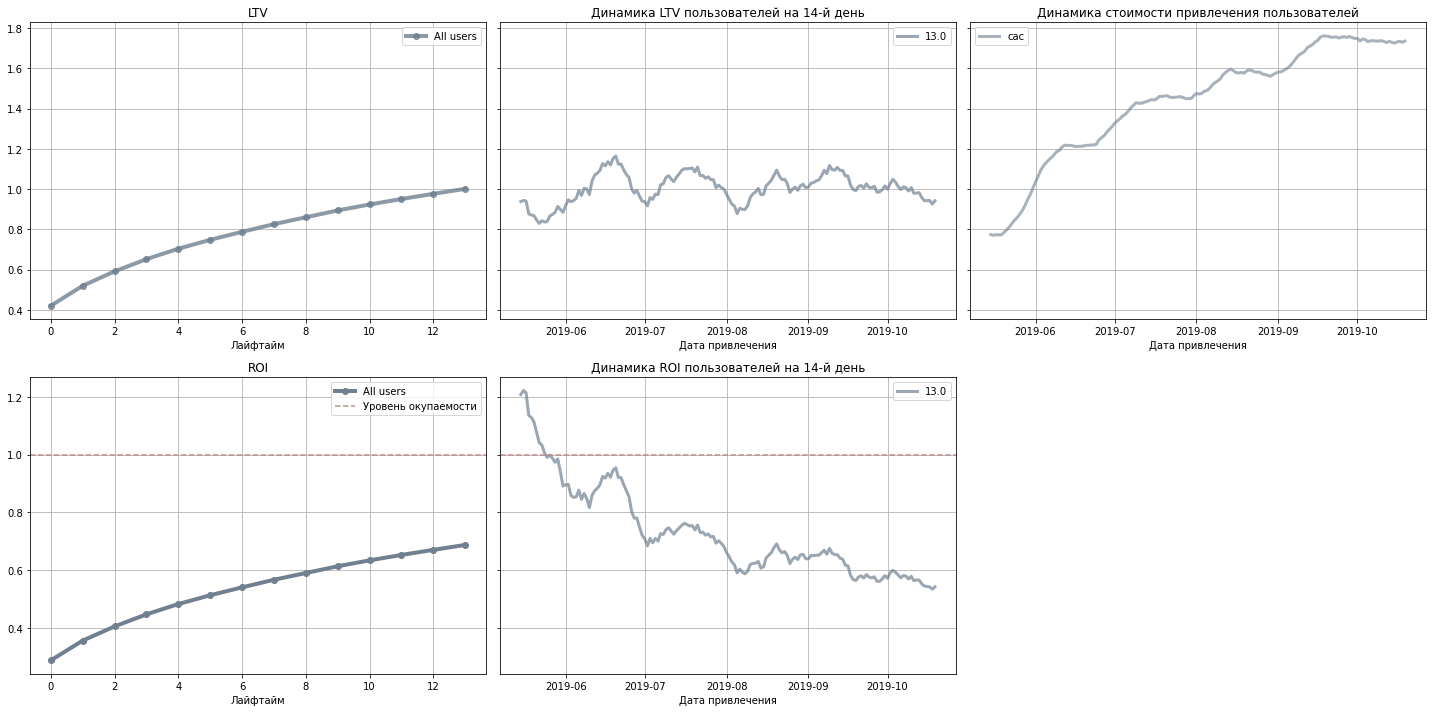

In [53]:

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history =  get_ltv(profiles_usa,
       orders,
       observation_date,
       horizon_days,
       dimensions=[],
       ignore_horizon=False)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=15)

Реклама по США не окупается, **ROI** приближается к 70%, динамика стоимость показывает рост.

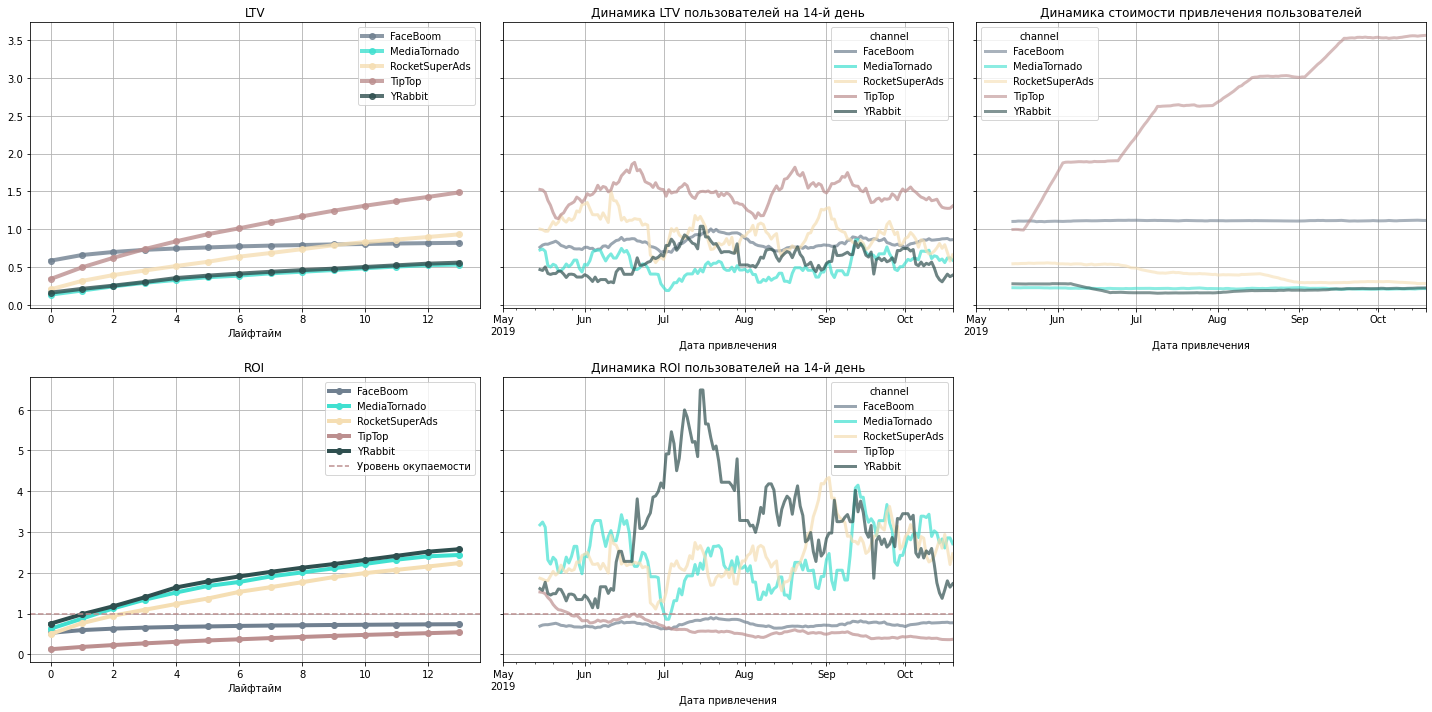

In [54]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history =  get_ltv(profiles_usa,
       orders,
       observation_date,
       horizon_days,
       dimensions=['channel'],
       ignore_horizon=False)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=15)


Видим, что канал  `TipTop` и `FaceBoom` - не окупаются. 
`YRabbit`, `MediaTornado`, `RocketSuperAds` - окупаются. 
Однако пожизненная ценность клиента выше всего у канала  `TipTop`.  Также высокий показзатель у `FaceBoom` и `YRabbit`.

При этом динамики стоимости привлечения по каналу `TipTop` - очень значительно выросла под конец периода.

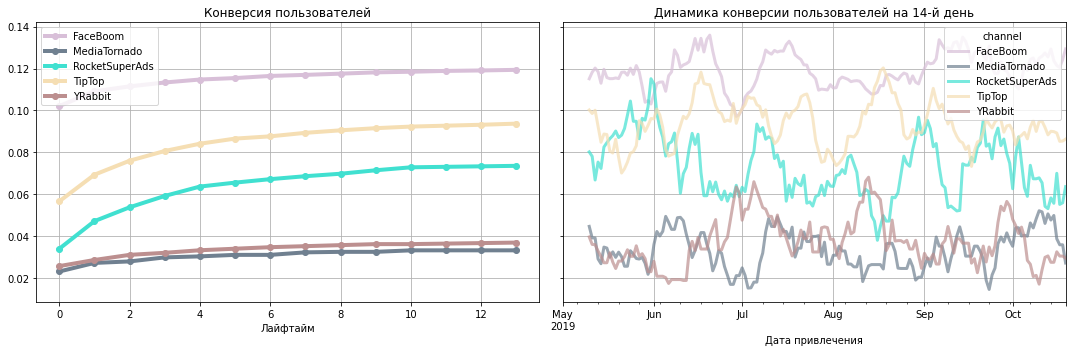

In [55]:
# расчёт конверсии
conversion_raw, conversion_grouped, conversion_history = get_conversion( 
       profiles_usa,
       orders, 
       observation_date,
       horizon_days,
       dimensions=['channel'],
       ignore_horizon=False)
#  визуализация конверсии

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=10)

Конверсия пользователей лучше всего у `FaceBoom` - 12 %, у `TipTop` и `RocketSuperAds` - около 9 и 7 % соответсвенно под конец наблюдаемого периода. 

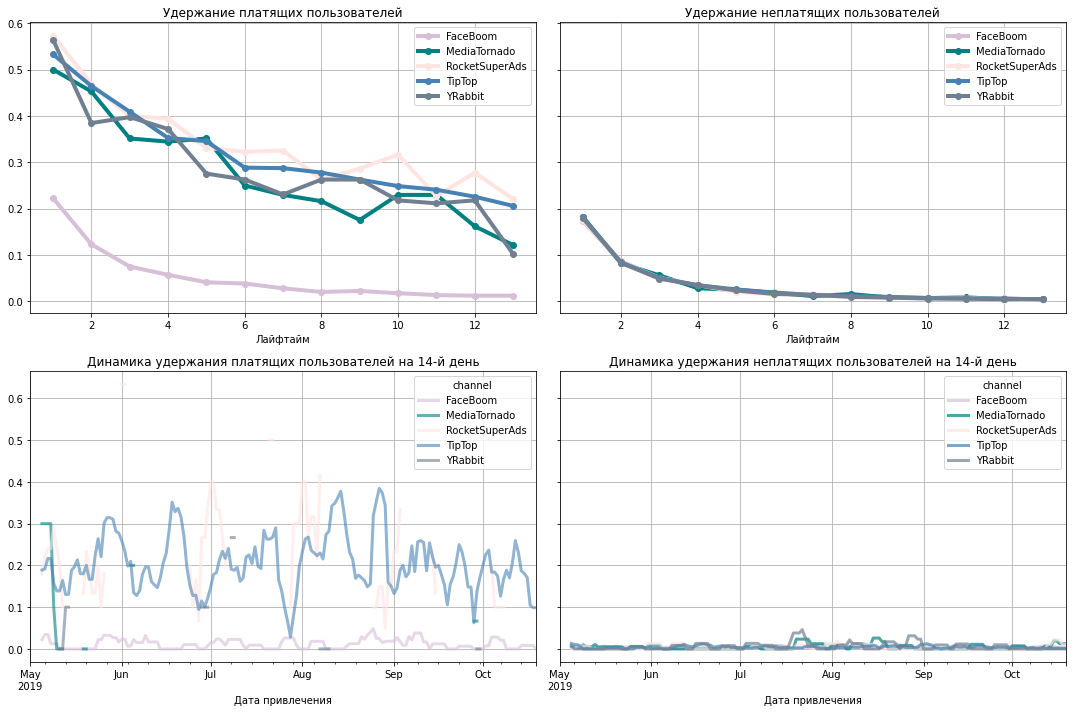

In [56]:
# расчёт удержания

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa,
    visits,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)

#  визуализация удержания
plot_retention(retention_grouped, retention_history, horizon_days, window=5)

Удержание платящих пользователей `FaceBoom` - сильно проседает по сравнению с другими каналами - даже приближается к нулю, на уровне неплатящих пользователей.

#### Проверка гипотезы

В результате анализа видим, что пользователи из канала TipTop - самые дорогие, хоть и показывают хорошее удержание и самый высокий LTV, но реклама все равно не окупается. 
У канала FaceBoom - тоже проблемы с окупаемостью, но это самый большой канал.
Попробуем исключить TipTop из анализа и посмотрим  на результат. 


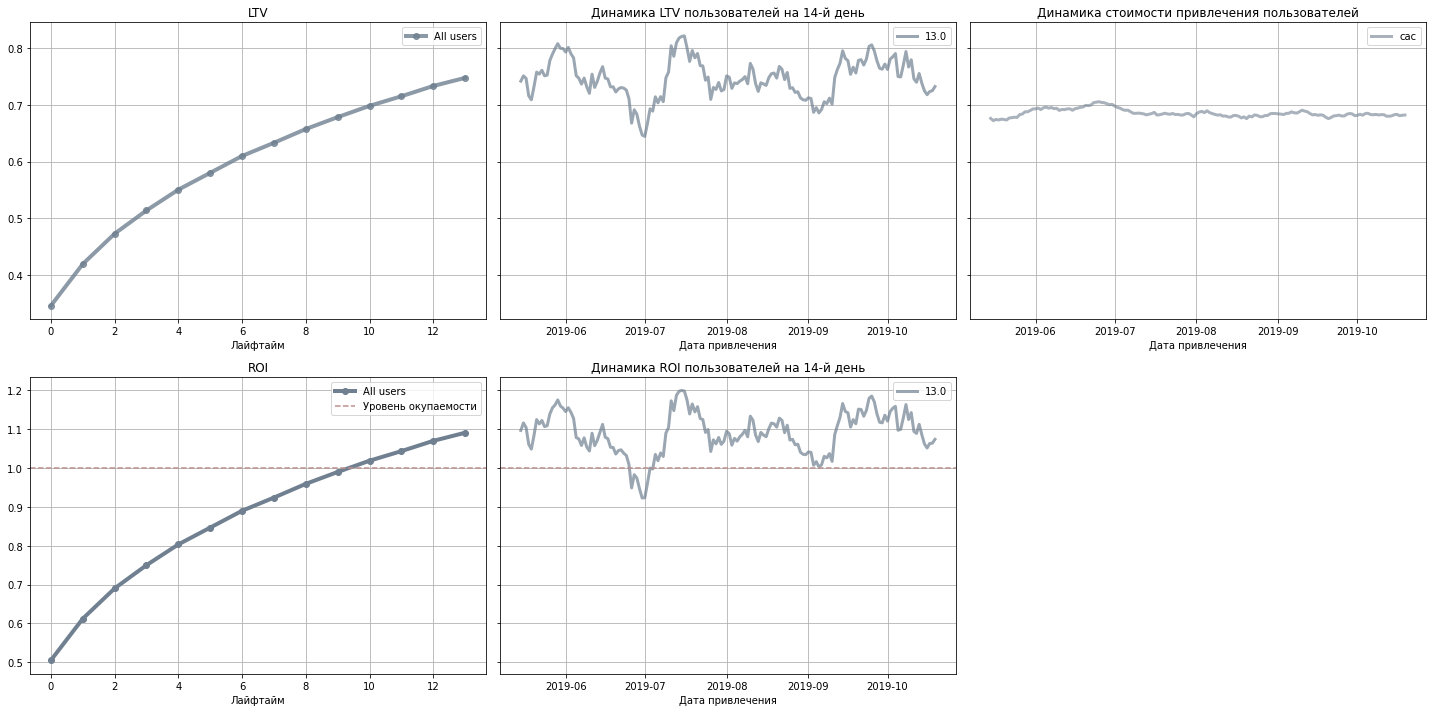

In [57]:
profiles_mark_no = profiles_mark.query('channel != "TipTop"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history =  get_ltv(profiles_mark_no,
       orders,
       observation_date,
       horizon_days,
       dimensions=[],
       ignore_horizon=False)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=15)

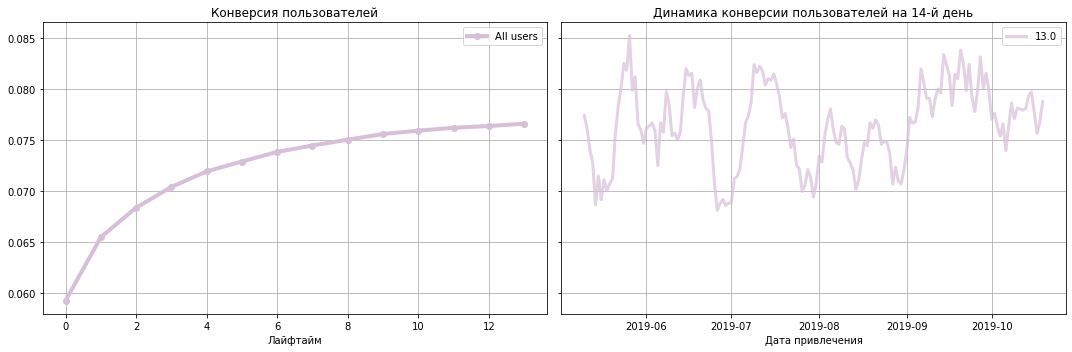

In [58]:
# расчёт конверсии
conversion_raw, conversion_grouped, conversion_history = get_conversion( 
       profiles_mark_no,
       orders, 
       observation_date,
       horizon_days,
       dimensions=[],
       ignore_horizon=False)
#  визуализация конверсии

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=10)

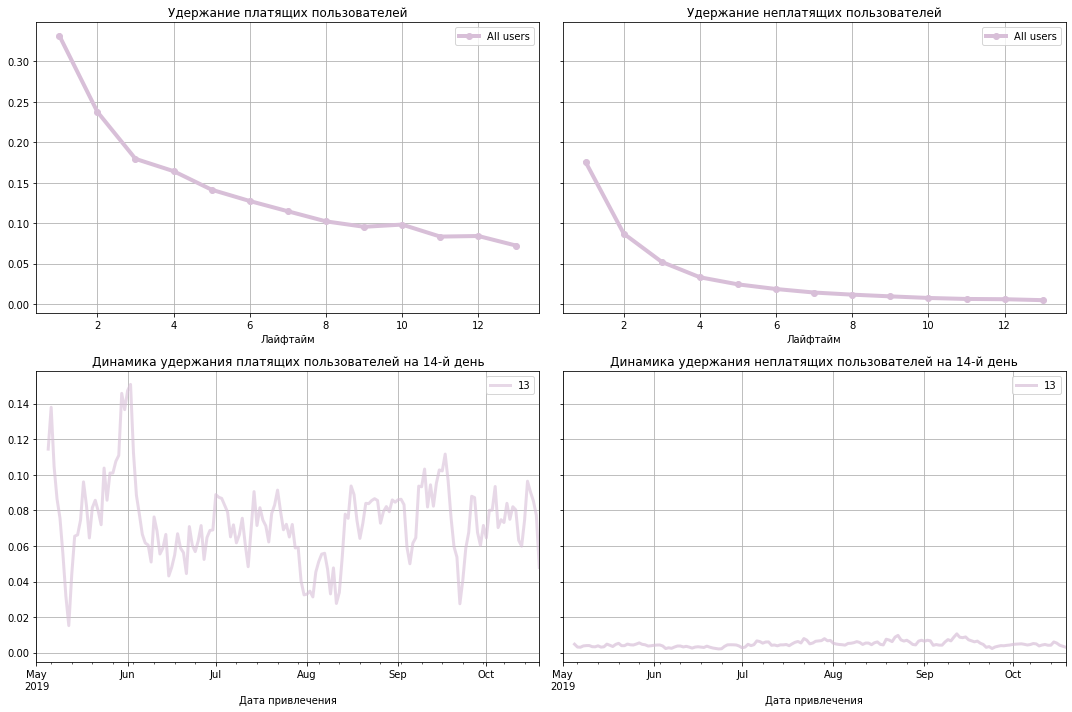

In [59]:
# расчёт удержания

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_mark_no,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)

#  визуализация удержания
plot_retention(retention_grouped, retention_history, horizon_days, window=5)

Видим, таким образом, что рекалама окупалась бы без этого канала. 

#### Ответы на вопросы:

Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
На даныый момент реклама не окупается. 
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
Негативное влияние оказывают рекламные каналы -  `TipTop`,`FaceBoom`, `AdNonSense`- затраты на них не окупаются. Такая же ситуация с регионом - регион США не окупает себя, как и типы устройств  `iPhone`, `Android` и `Mac`. 
Проблема в том, что это самые крупные разрезы для копмании.
    - Чем могут быть вызваны проблемы окупаемости?
Проблемы могут быть вызваны неэффективностью рекламной компании - скорее всего, реклама слишком дорогая и на слишком дорогие регионы.
Возможно, регион США достаточно большой, пользователи из этого региона часто платящие и показывают хорошее удержание, но у них слишком высокая стоимость привлчечения. 
Также реклама по основным каналам за эти две недели не окупала себя - стоимость у `TipTop` значительно выросла, но на эффективности это не сказалось. 
В первую очередь нужно разобртаться с этой рекламой - по какой причине она неэффективна, несмотря на такую высокую стоимость?
Также стоит обратить внимание на `FaceBoom`  и `AdNonsense` - эта реклама также не окупается, хотя показывает хорошую конверсию.
Однако эти каналы показывают очень плохое удержание - возможно, реклама неясно доносит ценность продукта, и клиент не возвращается. 


### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Количетсво уникальных профилей -150 008. При этом количество платящих пользоватлей - 8 881, т.е. средняя конверсия - 6%.

Главный регион -  США - 66% пользователей, из которых 7% - платящие.
На три другие страны приходится около 10 %, платящих в этих странах не более 4.2 %.


Главный девайс - `iPhone`, его используют более трети уникальных посетителейи 36 %. 
Процент платящих пользователей выше у тех, кто пользуется `Mac`.

Наибольшее количество уникальных пользователей приходят из органического траффика (37%).
Однако там один из самых маленьких процентов платящих пользователей (2%).
На втором месте по количеству пользователей - `FaceBoom` (19%), далее - `TipTop` (13%). Около 6 % - у `OppleCreativeMedia`, `LeapBob`, `WahooNetBanner`. 	

Самый высокий процент платящих - у канала `FaceBoom`-12%.

`AdNonSense` и `lambdaMediaAds` - на втором и третьем месте по размеру доли платящих пользователей - 11.3% и 10.5%. 
Третитий по размеру и четвертый по проценту платящих - `TipTop` 9.6% платящих.
Далее - `RocketSuperAds` - 8%, `WahooNetBanner`- 5.3%

Больше всего расходов приходится на канал `TipTop` - более 50%, на втором месте канал `FaceBoom`, на который приходится 30% орасходов, оставльные расходы распределены между оставшимися каналами. `AdNonSense` и `lWahooNetBanner` - по 4 и 5 % соответственно, на остальные каналы - менешье затрат.

Расходы на все каналы, кроме двух самых "дорогих" - довольно стабильны.
По двум самым затратным каналам - `TipTop` (в среднем более 8 000 в месяц, рост) , `FaceBoom` (около 6 000 в месяц) - видим рост до сентября и августа соответственно, затем - снижение. 
по каналу `WahooNetBanner` (в среднем 1 000 в месяц), остальные источники более стабильны по расходам.
(Около 600 в неделю)


Реклама `TipTop` - самая дорогая в расчете на одного пользователя - 2.79. Тогда как реклама `FaceBoom` 1.11. 
Самый низкий показатель САС - менее 0.25 за пользователя - у канала `OppleCreativeMedia`, `YRabbit`,`MediaTornado` и`LeapBob`.

В целом можно заключить, что за этот период реклама не окупается. ROI в конце наблюдаемого периода — только приближается к значению 80%.
САС растет значительно - возможно, дело в увеличении рекламного бюджета.
На LTV испытывает сезонность, но этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
Стоимость привлечения пользователя постоянно растет в целом, но и конверсия растет.

При этом начиная с с июня динамика конверсии стабильно больше 7% и приближается к 8.5 %.

При рассмотре по устройствам видим, что пользователи `PC` стабильно окупаются, а вот владельцы `iPhone`, `Android` и `Mac` — нет.
При этом видим, что самые дорогие в привлечении - `iPhone`и `Mac`.

Владельцы `Mac`,`iPhone`, `Android` (в порядке убывания) конвертируются очень хорошо и постоянно.
`PC` конвертируются хуже, но не значительно.
По всем девайсам наблюдается снижение удержания, у`PC`немного  лучше, но не драматично - результат приближается к 10%. 
Видимо, основная проблема по `iPhone` - в высокой стоимости.

В разрезе регионов: `Germany`, `France`, `UK` — окупаются и со значительным отрывом от основного рынка - United States, который не окупается совсем, но имеет самых дорогих в привлечении пользователи - из региона United States.
Если по другим странам стоимость привлечения начиная с июня  снижается и достигает 0.4, то для США - растёт и достигает значения 1.6.
Хотя конверсия пользователей - из региона `United States` вдвое лучше, чем по другим регионам, удержание - почти вдвое ниже, чем по другим регионам - ниже 10%.
Регионы `Germany`, `France`, `UK` — показывают удержание платящих пользователей на уровне 15-20% на конец рассматриваемого периода.

В разрезе каналов наиболее высокий показатель **ltv** - у пользователей из канала `TipTop` и  `lambdaMediaAds`. 

У канала `TipTop`,`FaceBoom`, `AdNonSense`- затраты не окупаются.
При этом динамика стоимости привлечения у `TipTop` - самая высокая, растет и достигает 3.5.


У каналов  `YRabbit`,`MediaTornado`, `lambdaMediaAds`, `LeapBob`, `RocketSuperAds` - затраты  окупаются. 
ROI на конец периода больше двух для всех этих каналов. 

Конверсия пользователей лучше всего у каналов: `FaceBoom`, `AdNonSense` и `lambdaMediaAds` - от 12% до 10% соответственно.

У канала `TipTop` - приближается к 10%.

Ниже всего у `LeapBob`, `YRabbit`, `MediaTornado`,  `OpelCreativeMedia` - меньше 4%.

При рассмотрении основного региона, можно сказать, что реклама по США не окупается, **ROI** приближается к 70%, динамика стоимость показывает рост.

Затраты по каналам `TipTop`,`FaceBoom`, `AdNonSense`в США не окупаются.
Однако если из анализа убрать  хотя бы `TipTop`, то реклама окупится.

**Причины**
- неэффективность рекламной компании `TipTop`- скорее всего, реклама слишком дорогая и на слишком дорогие регионы или на слишком дорогих в привлечении пользователей.
- нечеткость рекламной компании на `FaceBoom`  и `AdNonsense` - эта реклама также не окупается, хотя показывает хорошую конверсию, но низкое удержание говорит о том, что пользователь уходит, не видя ценности в продукте - возможно, ситуация в неверном донесении ключевоых характеристик
- регион США - не самый эффективны - он достаточно большой, пользователи из этого региона часто платящие и показывают хорошее удержание, но у них слишком высокая стоимость привлчечения. 

**Рекомендации для отдела маркетинга**

Краткосрочные:

- проанализировать результаты показателей `TipTop` - нужно проанализировать, почему стоимость привлкечение не снижается.

- проанализировать компании на `FaceBoom`  и `AdNonsense` - эта реклама также не окупается, хотя показывает хорошую конверсию, но низкое удержание говорит о том, что пользователь уходит, не видя ценности в продукте - возможно, ситуация в неверном донесении ключевоых характеристик

Долгосрочные:
- фокус на других источниках, которые хорошо себя показывают, например, `lambdaMediaAds
- фокус на другом регионе  